
# Simple linear regression

In [1]:
# Importing all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading data

data = pd.read_csv("/content/drive/MyDrive/#100DaysofMLcode/Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
# Dependent variables and independent variables

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [14]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [15]:
# Importing Linear model package
from sklearn.linear_model import LinearRegression

# Initializing the model
reg = LinearRegression().fit(X_train,y_train)

In [17]:
# Score = R^2 ( Root mean square )

reg.score(X_train, y_train)

0.9381900012894278

In [18]:
# Parameters value

reg.coef_

array([9345.94244312])

In [19]:
# Predicting

reg.predict(X_test)

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

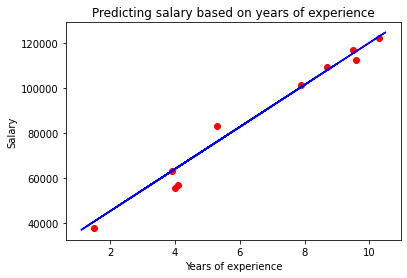

In [22]:
# Plotting test set with regressor 

plt.scatter(X_test, y_test, color="red")
plt.plot(X_train, reg.predict(X_train), color="blue")
plt.title("Predicting salary based on years of experience")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

# Multiple linear regression

In [23]:
# Importing all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Loading data

data = pd.read_csv("/content/drive/MyDrive/#100DaysofMLcode/50_Startups.csv")

In [25]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [31]:
# Dependent variables and independent variables

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [32]:
# Encoding categorical variables

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [33]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
# Model fitting

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
# Predicting 

y_pred = regressor.predict(X_test)

print(y_pred)

[103015.20159795 132582.27760816 132447.73845175  71976.09851258
 178537.48221057 116161.24230167  67851.69209676  98791.73374687
 113969.43533014 167921.06569552]


# Polynomial regression

In [38]:
# Loading data

data = pd.read_csv("/content/drive/MyDrive/#100DaysofMLcode/Position_Salaries.csv")

In [39]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [41]:
# Dependent variables and independent variables

X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [42]:
# Model fitting 

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

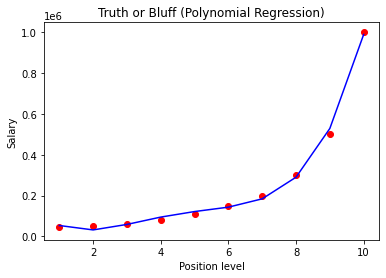

In [43]:
# Visualizing the polynomial regression 

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

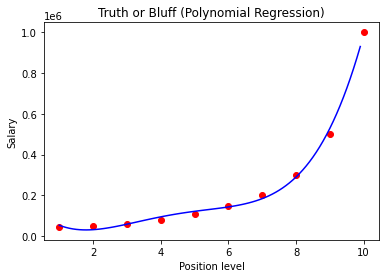

In [44]:
# Visualizing the polynomial regression 
# Smooth curves 

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()